In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Imported the libraries

In [2]:
df = pd.read_csv("C:/Users/Admin.ROBERT-LENOVO-T/Desktop/M4S4/train.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


📁 Loaded and Inspected the Data

🧹 2. Clean the Data
Check for missing values

Decide whether to impute or drop

Ensure the target column is binary (usually named something like TenYearCHD or CHD)

In [3]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

Check missing values

In [4]:
df.fillna(df.median(numeric_only=True), inplace=True)

Fill numeric NaNs with median

📊 3. Exploratory Data Analysis (EDA)
Distribution of the target variable

Compare CHD vs non-CHD patients (e.g. age, blood pressure, smoking)

Correlation heatmap

Use violin/boxplots for continuous features vs CHD

Text(0.5, 1.0, 'Distribution of CHD Risk')

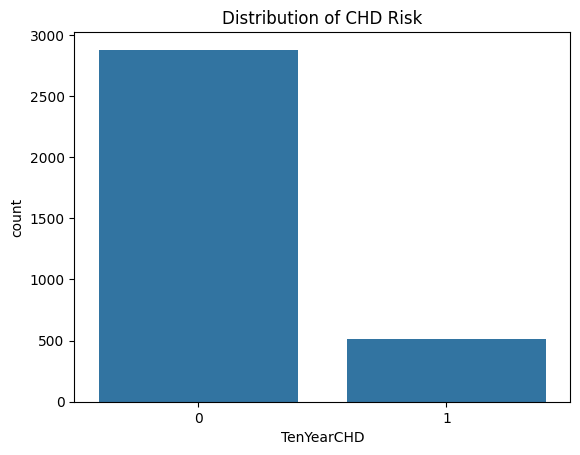

In [5]:
sns.countplot(data=df, x='TenYearCHD')
plt.title("Distribution of CHD Risk")

Target distribution

<Axes: >

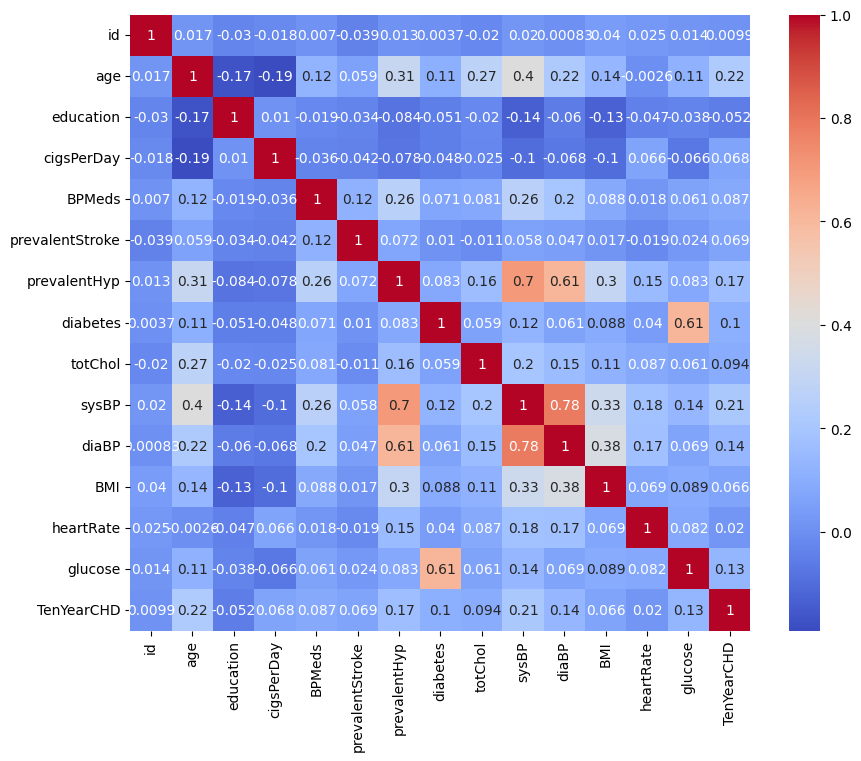

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')

Heatmap

🧪 Split into Train/Test Sets

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

📐  Fit Logistic Regression Model

In [10]:
df.dtypes

id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [11]:
df['sex'] = df['sex'].map({'M': 1, 'F': 0})
df['is_smoking'] = df['is_smoking'].map({'YES': 1, 'NO': 0})

In [13]:
df = df.drop(columns=['id'])

In [14]:
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [15]:
print(X_train.dtypes)

age                  int64
education          float64
sex                  int64
is_smoking           int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
dtype: object


In [16]:
print(X_train.isnull().sum().sum())

0


In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=50000)
model.fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)[:, 1]

📏 Classification Metrics & Threshold Optimization

In [19]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Default threshold = 0.5
y_pred_label = (y_pred_prob >= 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_label))
print("Precision:", precision_score(y_test, y_pred_label))
print("Recall:", recall_score(y_test, y_pred_label))
print("F1-score:", f1_score(y_test, y_pred_label))
print("ROC AUC:", roc_auc_score(y_test, y_pred_prob))

Accuracy: 0.8561320754716981
Precision: 1.0
Recall: 0.046875
F1-score: 0.08955223880597014
ROC AUC: 0.7459635416666666


📊 Evaluate metrics

🎯 Find the Optimal Threshold

In [20]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = f1_scores.argmax()
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold for F1-score: {optimal_threshold:.2f}")

Optimal Threshold for F1-score: 0.16


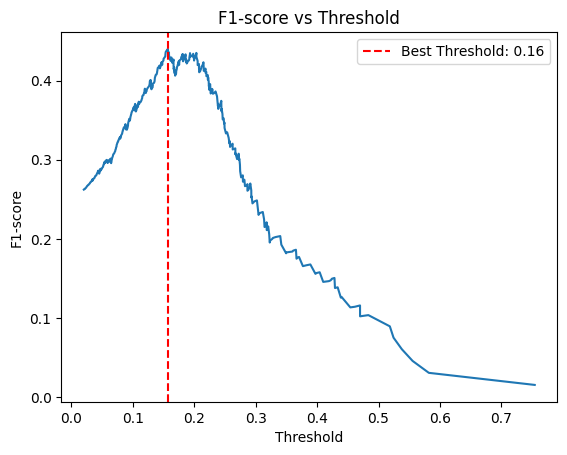

In [21]:
plt.plot(thresholds, f1_scores[:-1])
plt.axvline(optimal_threshold, color='red', linestyle='--', label=f'Best Threshold: {optimal_threshold:.2f}')
plt.title('F1-score vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.legend()

✅ Interpret Model & Results

In [22]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)

            Feature  Coefficient
6   prevalentStroke     0.516972
2               sex     0.455132
7      prevalentHyp     0.196940
8          diabetes     0.169475
3        is_smoking     0.080595
5            BPMeds     0.057670
0               age     0.056272
4        cigsPerDay     0.022467
10            sysBP     0.014766
14          glucose     0.008845
13        heartRate    -0.007043
1         education     0.005612
9           totChol     0.002713
12              BMI    -0.000709
11            diaBP    -0.000461


Higher coefficients → greater effect on CHD risk